<a href="https://colab.research.google.com/github/aneeshcheriank/tensorflow/blob/main/Custom_loss_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Loss Class
- Custom loss function
  - need to hardcore parameter values
  - to parameterize the values need to define a class

- example code

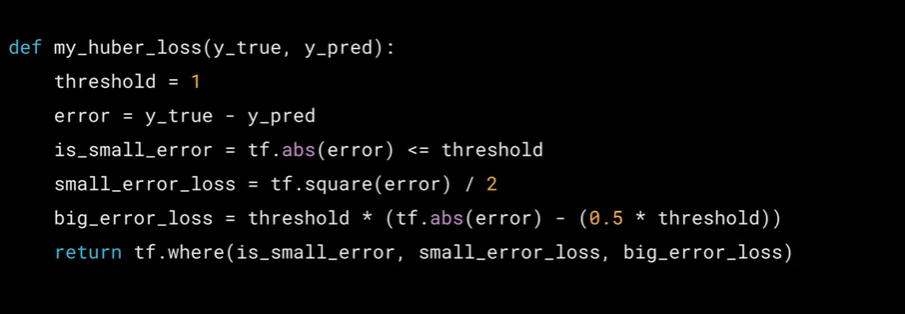

- another way to pass the threshold as a parameter is to wrap the loss function within a wrapper function

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np

def my_huber_loss_with_threshold(threshold=1):
  def my_huber_loss(y_true, y_pred):
    error = y_true - y_pred
    return tf.where(
        tf.abs(error) <= threshold,
        tf.square(error)/2,
        threshold * (tf.abs(error) - threshold/2)
    )
  return my_huber_loss

x = np.arange(-10, 10, 1, dtype=float)
y = 2*x + 14

model = keras.Sequential([
     Dense(1, input_shape=[1])                     
])

model.compile(
    loss = my_huber_loss_with_threshold(1),
    optimizer = 'sgd'
)

model.fit(
    x, y,
    epochs = 100,
    verbose=0
)

In [12]:
model.layers[0].weights

[<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.66780406]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([0.8828494], dtype=float32)>]